<h1>
    Sommaire<span class="tocSkip"></span>
</h1>
<br>
<div class="toc">
    <ul class="toc-item">
        <li>
            <span>
                <a href="#Chargement-des-données" data-toc-modified-id="Chargement-des-données-1">
                    <span class="toc-item-num">1.&nbsp;&nbsp;</span>Chargement des données
                </a>
            </span>
        </li>
        <li>
            <span>
                <a href="#Segmentation-RFM-:-baseline" data-toc-modified-id="Segmentation-RFM-:-baseline-2">
                    <span class="toc-item-num">2.&nbsp;&nbsp;</span>Segmentation RFM : baseline
                </a>
            </span>
            <ul class="toc-item">
                <li>
                    <span>
                        <a href="#Automatique" data-toc-modified-id="Automatique">
                            <span class="toc-item-num">2.1.&nbsp;&nbsp;</span>Automatique
                        </a>
                    </span>
                </li>
                <li>
                    <span>
                        <a href="#Manuelle" data-toc-modified-id="Manuelle">
                            <span class="toc-item-num">2.2.&nbsp;&nbsp;</span>Manuelle
                        </a>
                    </span>
                </li>
            </ul>
        </li>
        <li>
            <span>
                <a href="#Segmentation-kmeans-sur-plusieurs-variables-numériques" data-toc-modified-id="Segmentation-kmeans-sur-plusieurs-variables-numériques-3">
                    <span class="toc-item-num">3.&nbsp;&nbsp;</span>Segmentation kmeans sur plusieurs variables numériques
                </a>
            </span>
            <ul class="toc-item">
                <li>
                    <span>
                        <a href="#Challenge-kmeans-avec-4-clusters" data-toc-modified-id="Challenge-kmeans-avec-4-clusters-31">
                            <span class="toc-item-num">3.1.&nbsp;&nbsp;</span>Challenge kmeans avec 4 clusters
                        </a>
                    </span>
                </li>
            </ul>
        </li>
        <li>
            <span>
                <a href="#Segmentation-k-prototypes-sur-tout-type-de-variables" data-toc-modified-id="Segmentation-k-prototypes-sur-tout-type-de-variables-4">
                    <span class="toc-item-num">4.&nbsp;&nbsp;</span>Segmentation k prototypes sur tout type de variables
                </a>
            </span>
        </li>
        <li>
            <span>
                <a href="#Analyse-de-la-stabilité-de-la-segmentation" data-toc-modified-id="Analyse-de-la-stabilité-de-la-segmentation-5">
                    <span class="toc-item-num">5.&nbsp;&nbsp;</span>Analyse de la stabilité de la segmentation
                </a>
            </span>
        </li>
    </ul>
</div>

In [1]:
import pandas as pd

dossier_data = "data/"
nom_fichier = "flipkart_com-ecommerce_sample_1050.csv"
produits_data = pd.read_csv(dossier_data+nom_fichier)

In [2]:
produits_data

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,55b85ea15a1536d46b7190ad6fff8ce7,2016-04-30 03:22:56 +0000,http://www.flipkart.com/elegance-polyester-mul...,Elegance Polyester Multicolor Abstract Eyelet ...,"[""Home Furnishing >> Curtains & Accessories >>...",CRNEG7BKMFFYHQ8Z,1899.0,899.0,55b85ea15a1536d46b7190ad6fff8ce7.jpg,False,Key Features of Elegance Polyester Multicolor ...,No rating available,No rating available,Elegance,"{""product_specification""=>[{""key""=>""Brand"", ""v..."
1,7b72c92c2f6c40268628ec5f14c6d590,2016-04-30 03:22:56 +0000,http://www.flipkart.com/sathiyas-cotton-bath-t...,Sathiyas Cotton Bath Towel,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEGFZHGBXPHZUH,600.0,449.0,7b72c92c2f6c40268628ec5f14c6d590.jpg,False,Specifications of Sathiyas Cotton Bath Towel (...,No rating available,No rating available,Sathiyas,"{""product_specification""=>[{""key""=>""Machine Wa..."
2,64d5d4a258243731dc7bbb1eef49ad74,2016-04-30 03:22:56 +0000,http://www.flipkart.com/eurospa-cotton-terry-f...,Eurospa Cotton Terry Face Towel Set,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEG6SHXTDB2A2Y,NaN,NaN,64d5d4a258243731dc7bbb1eef49ad74.jpg,False,Key Features of Eurospa Cotton Terry Face Towe...,No rating available,No rating available,Eurospa,"{""product_specification""=>[{""key""=>""Material"",..."
3,d4684dcdc759dd9cdf41504698d737d8,2016-06-20 08:49:52 +0000,http://www.flipkart.com/santosh-royal-fashion-...,SANTOSH ROYAL FASHION Cotton Printed King size...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJT9UQWHDUBH4,2699.0,1299.0,d4684dcdc759dd9cdf41504698d737d8.jpg,False,Key Features of SANTOSH ROYAL FASHION Cotton P...,No rating available,No rating available,SANTOSH ROYAL FASHION,"{""product_specification""=>[{""key""=>""Brand"", ""v..."
4,6325b6870c54cd47be6ebfbffa620ec7,2016-06-20 08:49:52 +0000,http://www.flipkart.com/jaipur-print-cotton-fl...,Jaipur Print Cotton Floral King sized Double B...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJTHNGWVGWWQU,2599.0,698.0,6325b6870c54cd47be6ebfbffa620ec7.jpg,False,Key Features of Jaipur Print Cotton Floral Kin...,No rating available,No rating available,Jaipur Print,"{""product_specification""=>[{""key""=>""Machine Wa..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1045,958f54f4c46b53c8a0a9b8167d9140bc,2015-12-01 10:15:43 +0000,http://www.flipkart.com/oren-empower-extra-lar...,Oren Empower Extra Large Self Adhesive Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",STIE88ZGTX65GH4V,1399.0,999.0,958f54f4c46b53c8a0a9b8167d9140bc.jpg,False,Oren Empower Extra Large Self Adhesive Sticker...,No rating available,No rating available,Oren Empower,"{""product_specification""=>[{""key""=>""Number of ..."
1046,fd6cbcc22efb6b761bd564c28928483c,2015-12-01 10:15:43 +0000,http://www.flipkart.com/wallmantra-large-vinyl...,Wallmantra Large Vinyl Sticker Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",STIEC889ZD5GDCVQ,4930.0,1896.0,fd6cbcc22efb6b761bd564c28928483c.jpg,False,Wallmantra Large Vinyl Sticker Sticker (Pack o...,No rating available,No rating available,Wallmantra,"{""product_specification""=>[{""key""=>""Number of ..."
1047,5912e037d12774bb73a2048f35a00009,2015-12-01 10:15:43 +0000,http://www.flipkart.com/uberlyfe-extra-large-p...,Uberlyfe Extra Large Pigmented Polyvinyl Films...,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",STIE5UVGW2JWVWCT,4500.0,1449.0,5912e037d12774bb73a2048f35a00009.jpg,False,Buy Uberlyfe Extra Large Pigmented Polyvinyl F...,No rating available,No rating available,Uberlyfe,"{""product_specification""=>[{""key""=>""Number of ..."
1048,c3edc504d1b4f0ba6224fa53a43a7ad6,2015-12-01 10:15:43 +0000,http://www.flipkart.com/wallmantra-medium-viny...,Wallmantra Medium Vinyl Sticker Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >.

In [3]:
produits_data.product_category_tree.sample(15)

353     ["Computers >> Network Components >> Routers >...
474     ["Kitchen & Dining >> Bar & Glassware >> Bar G...
521     ["Watches >> Wrist Watches >> Maxima Wrist Wat...
347     ["Beauty and Personal Care >> Fragrances >> De...
126     ["Beauty and Personal Care >> Body and Skin Ca...
663     ["Home Furnishing >> Curtains & Accessories >>...
343     ["Computers >> Network Components >> Routers >...
259     ["Kitchen & Dining >> Cookware >> Pots & Pans ...
1029    ["Home Furnishing >> Curtains & Accessories >>...
365     ["Beauty and Personal Care >> Fragrances >> De...
691     ["Beauty and Personal Care >> Body and Skin Ca...
836     ["Computers >> Laptop Accessories >> USB Gadge...
318     ["Computers >> Network Components >> Routers >...
587     ["Watches >> Wrist Watches >> Maxima Wrist Wat...
289     ["Home Decor & Festive Needs >> Showpiece >> C...
Name: product_category_tree, dtype: object

# Analyse et prétraitement des descriptions

## Tokenization, retrait de la ponctuation et mise en minuscules

In [4]:
produits_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   uniq_id                  1050 non-null   object 
 1   crawl_timestamp          1050 non-null   object 
 2   product_url              1050 non-null   object 
 3   product_name             1050 non-null   object 
 4   product_category_tree    1050 non-null   object 
 5   pid                      1050 non-null   object 
 6   retail_price             1049 non-null   float64
 7   discounted_price         1049 non-null   float64
 8   image                    1050 non-null   object 
 9   is_FK_Advantage_product  1050 non-null   bool   
 10  description              1050 non-null   object 
 11  product_rating           1050 non-null   object 
 12  overall_rating           1050 non-null   object 
 13  brand                    712 non-null    object 
 14  product_specifications  

Déjà, il n'y a pas de donnée manquante dans cette variable.

In [12]:
# Conservation de l'id et de la description pour la travailler et l'analyser
descriptions = produits_data[['uniq_id', 'description']].copy() 

In [13]:
descriptions

,uniq_id,description
0,55b85ea15a1536d46b7190ad6fff8ce7,Key Features of Elegance Polyester Multicolor ...
1,7b72c92c2f6c40268628ec5f14c6d590,Specifications of Sathiyas Cotton Bath Towel (...
2,64d5d4a258243731dc7bbb1eef49ad74,Key Features of Eurospa Cotton Terry Face Towe...
3,d4684dcdc759dd9cdf41504698d737d8,Key Features of SANTOSH ROYAL FASHION Cotton P...
4,6325b6870c54cd47be6ebfbffa620ec7,Key Features of Jaipur Print Cotton Floral Kin...
...,...,...
1045,958f54f4c46b53c8a0a9b8167d9140bc,Oren Empower Extra Large Self Adhesive Sticker...
1046,fd6cbcc22efb6b761bd564c28928483c,Wallmantra Large Vinyl Sticker Sticker (Pack o...
1047,5912e037d12774bb73a2048f35a00009,Buy Uberlyfe Extra Large Pigmented Polyvinyl F...
1048,c3edc504d1b4f0ba6224fa53a43a7ad6,Buy Wallmantra Medium Vinyl Sticker Sticker fo...


In [14]:
import nltk

# conserve les mots d'au moins une lettre (supprime donc la ponctuation et les nombres)
tokenizer = nltk.RegexpTokenizer(r'[A-Za-z]+')

# tokenization et mise en minuscules des descriptions
descriptions["description_tokenisee"] = ""
for index_ligne, ligne in descriptions.iterrows():
    descriptions.loc[index_ligne, "description_tokenisee"] = tokenizer.tokenize(ligne['description'].lower())

In [15]:
descriptions

,uniq_id,description,description_tokenisee
0,55b85ea15a1536d46b7190ad6fff8ce7,Key Features of Elegance Polyester Multicolor ...,"[key, features, of, elegance, polyester, multi..."
1,7b72c92c2f6c40268628ec5f14c6d590,Specifications of Sathiyas Cotton Bath Towel (...,"[specifications, of, sathiyas, cotton, bath, t..."
2,64d5d4a258243731dc7bbb1eef49ad74,Key Features of Eurospa Cotton Terry Face Towe...,"[key, features, of, eurospa, cotton, terry, fa..."
3,d4684dcdc759dd9cdf41504698d737d8,Key Features of SANTOSH ROYAL FASHION Cotton P...,"[key, features, of, santosh, royal, fashion, c..."
4,6325b6870c54cd47be6ebfbffa620ec7,Key Features of Jaipur Print Cotton Floral Kin...,"[key, features, of, jaipur, print, cotton, flo..."
...,...,...,...
1045,958f54f4c46b53c8a0a9b8167d9140bc,Oren Empower Extra Large Self Adhesive Sticker...,"[oren, empower, extra, large, self, adhesive, ..."
1046,fd6cbcc22efb6b761bd564c28928483c,Wallmantra Large Vinyl Sticker Sticker (Pack o...,"[wallmantra, large, vinyl, sticker, sticker, p..."
1047,5912e037d12774bb73a2048f35a00009,Buy Uberlyfe Extra Large Pigmented Polyvinyl F...,"[buy, uberlyfe, extra, large, pigmented, polyv..."
1048,c3edc504d1b4f0ba6224fa53a43a7ad6,Buy Wallmantra Medium Vinyl Sticker Sticker fo...,"[buy, wallmantra, medium, vinyl, sticker, stic..."


In [16]:
def recuperer_ensemble_mots(descriptions_tokenisees):
    """
    Retourne la liste complète des mots de chacune des descriptions tokenisees.
    
    
    Paramètre :
        - descriptions_tokenisees : Series
    """
    
    liste_totalite_mots = []
    for index, description_tokenisee in descriptions_tokenisees.items():
        for mot in description_tokenisee:
            liste_totalite_mots.append(mot)
            
    return liste_totalite_mots

In [17]:
def calculer_frequences_apparitions_mots(liste_mots):
    """
    Calcule la fréquence d'apparition de chaque mot présent dans liste_mots et retourne 
    un DataFrame contenant ces fréquences.
    
    Paramètre : 
        - liste_mots : List
    """
    
    frequences_apparitions_mots = nltk.FreqDist(liste_mots)
    df_freq = pd.DataFrame.from_dict(frequences_apparitions_mots, orient='index', columns=['nb_apparitions'])
    df_freq.sort_values(by="nb_apparitions", ascending=False, inplace=True)
    return df_freq

In [18]:
liste_mots = recuperer_ensemble_mots(descriptions['description_tokenisee'])
frequences_apparition_mots = calculer_frequences_apparitions_mots(liste_mots)

**Top 50 des mots les plus utilisés dans l'ensemble des descriptions avant suppression des mots**

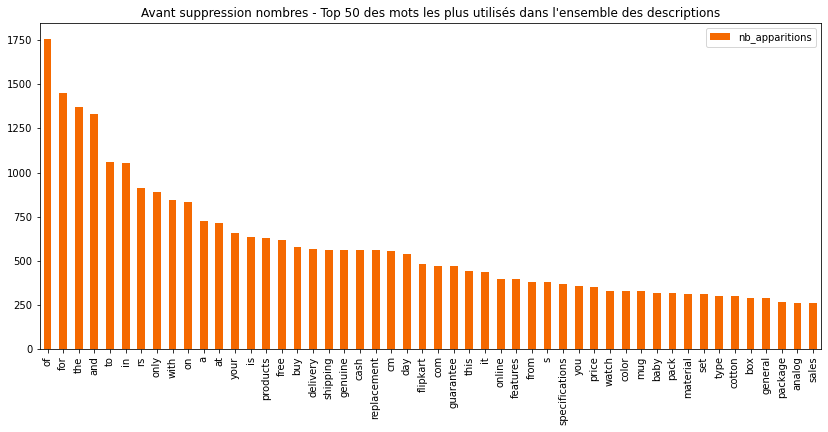

In [19]:
# Affichage des 50 mots les plus utilisés dans l'ensemble des descriptions
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (14, 6)

titre = 'Avant suppression nombres - Top 50 des mots les plus utilisés dans l\'ensemble des descriptions'
frequences_apparition_mots[:50].plot(kind='bar', 
                                     color="#f56900", 
                                     title=titre);

On voit clairement que les mots de liaisons sont les plus nombreux, ils seront supprimés lors de l'étape de suppression des stopwords. C'est le cas aussi des unités comme "rs", "cm", les nombres et le nom du site "flipkart.com", une suppression plus manuelle sera probablement à effectuer.

**Top 50 des mots les plus utilisés dans l'ensemble des descriptions après suppression des mots**

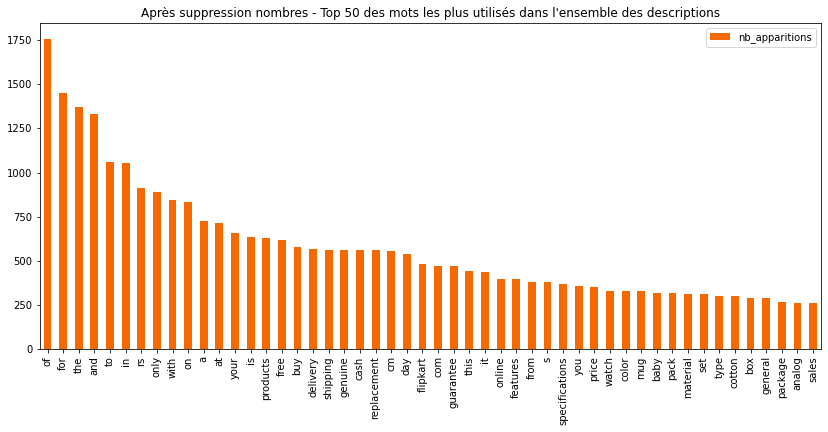

In [20]:
titre = 'Après suppression nombres - Top 50 des mots les plus utilisés dans l\'ensemble des descriptions'
frequences_apparition_mots[:50].plot(kind='bar', 
                                     color="#f56900", 
                                     title=titre);

## Suppression des stopwords

In [21]:
# Récupération des stopwords en anglais
#nltk.download('stopwords') # une fois installé, affiche un warning
stopwords = nltk.corpus.stopwords.words('english')

In [22]:
descriptions

,uniq_id,description,description_tokenisee
0,55b85ea15a1536d46b7190ad6fff8ce7,Key Features of Elegance Polyester Multicolor ...,"[key, features, of, elegance, polyester, multi..."
1,7b72c92c2f6c40268628ec5f14c6d590,Specifications of Sathiyas Cotton Bath Towel (...,"[specifications, of, sathiyas, cotton, bath, t..."
2,64d5d4a258243731dc7bbb1eef49ad74,Key Features of Eurospa Cotton Terry Face Towe...,"[key, features, of, eurospa, cotton, terry, fa..."
3,d4684dcdc759dd9cdf41504698d737d8,Key Features of SANTOSH ROYAL FASHION Cotton P...,"[key, features, of, santosh, royal, fashion, c..."
4,6325b6870c54cd47be6ebfbffa620ec7,Key Features of Jaipur Print Cotton Floral Kin...,"[key, features, of, jaipur, print, cotton, flo..."
...,...,...,...
1045,958f54f4c46b53c8a0a9b8167d9140bc,Oren Empower Extra Large Self Adhesive Sticker...,"[oren, empower, extra, large, self, adhesive, ..."
1046,fd6cbcc22efb6b761bd564c28928483c,Wallmantra Large Vinyl Sticker Sticker (Pack o...,"[wallmantra, large, vinyl, sticker, sticker, p..."
1047,5912e037d12774bb73a2048f35a00009,Buy Uberlyfe Extra Large Pigmented Polyvinyl F...,"[buy, uberlyfe, extra, large, pigmented, polyv..."
1048,c3edc504d1b4f0ba6224fa53a43a7ad6,Buy Wallmantra Medium Vinyl Sticker Sticker fo...,"[buy, wallmantra, medium, vinyl, sticker, stic..."


In [23]:
# On retire les stopwords pour chaque description tokenisée
descriptions["description_sans_stopword"] = ""
for index_ligne, ligne in descriptions.iterrows():
    description_tokenisee = ligne["description_tokenisee"]
    descriptions.loc[index_ligne, "description_sans_stopword"] = [mot for mot in description_tokenisee if mot not in stopwords]

In [24]:
descriptions

,uniq_id,description,description_tokenisee,description_sans_stopword
0,55b85ea15a1536d46b7190ad6fff8ce7,Key Features of Elegance Polyester Multicolor ...,"[key, features, of, elegance, polyester, multi...","[key, features, elegance, polyester, multicolo..."
1,7b72c92c2f6c40268628ec5f14c6d590,Specifications of Sathiyas Cotton Bath Towel (...,"[specifications, of, sathiyas, cotton, bath, t...","[specifications, sathiyas, cotton, bath, towel..."
2,64d5d4a258243731dc7bbb1eef49ad74,Key Features of Eurospa Cotton Terry Face Towe...,"[key, features, of, eurospa, cotton, terry, fa...","[key, features, eurospa, cotton, terry, face, ..."
3,d4684dcdc759dd9cdf41504698d737d8,Key Features of SANTOSH ROYAL FASHION Cotton P...,"[key, features, of, santosh, royal, fashion, c...","[key, features, santosh, royal, fashion, cotto..."
4,6325b6870c54cd47be6ebfbffa620ec7,Key Features of Jaipur Print Cotton Floral Kin...,"[key, features, of, jaipur, print, cotton, flo...","[key, features, jaipur, print, cotton, floral,..."
...,...,...,...,...
1045,958f54f4c46b53c8a0a9b8167d9140bc,Oren Empower Extra Large Self Adhesive Sticker...,"[oren, empower, extra, large, self, adhesive, ...","[oren, empower, extra, large, self, adhesive, ..."
1046,fd6cbcc22efb6b761bd564c28928483c,Wallmantra Large Vinyl Sticker Sticker (Pack o...,"[wallmantra, large, vinyl, sticker, sticker, p...","[wallmantra, large, vinyl, sticker, sticker, p..."
1047,5912e037d12774bb73a2048f35a00009,Buy Uberlyfe Extra Large Pigmented Polyvinyl F...,"[buy, uberlyfe, extra, large, pigmented, polyv...","[buy, uberlyfe, extra, large, pigmented, polyv..."
1048,c3edc504d1b4f0ba6224fa53a43a7ad6,Buy Wallmantra Medium Vinyl Sticker Sticker fo...,"[buy, wallmantra, medium, vinyl, sticker, stic...","[buy, wallmantra, medium, vinyl, sticker, stic..."


In [25]:
liste_mots = recuperer_ensemble_mots(descriptions['description_sans_stopword'])
frequences_apparition_mots = calculer_frequences_apparitions_mots(liste_mots)

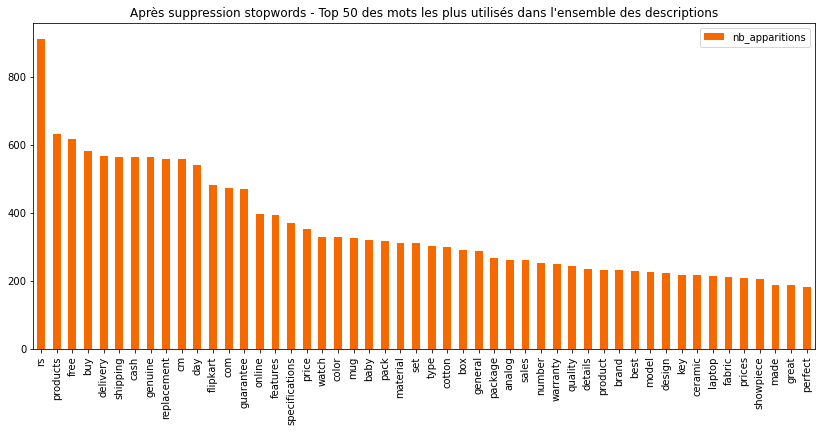

In [26]:
titre = 'Après suppression stopwords - Top 50 des mots les plus utilisés dans l\'ensemble des descriptions'
frequences_apparition_mots[:50].plot(kind='bar', 
                                     color="#f56900", 
                                     title=titre);

Parmi les mots les plus utilisés, il reste des mots qui n'apportent pas d'information utile pour catégoriser le produit. Cela concerne :
- rs (unité de prix)
- products
- free
- buy
- delivery
- shipping
- cash
- genuine
- replacement
- cm
- day
- flipkart (provient du nom du site flipkart.com)
- com (provient du nom du site flipkart.com)
- guarantee
- online
- price
- model
- x (qui est utilisé pour les dimensions comme 24x24 cm)

In [27]:
mots_sans_info = ['rs', 'products', 'free', 'buy', 'delivery', 'shipping', 'cash', 'genuine', 'replacement', 'cm',
                  'day', 'flipkart', 'com', 'guarantee', 'online', 'price', 'model', 'x']

In [28]:
# suppression des mots ci-dessus des descriptions sans stopword
for index_ligne, ligne in descriptions.iterrows():
    description_sans_stopword = ligne["description_sans_stopword"]
    descriptions.loc[index_ligne, "description_sans_stopword"] = [mot for mot in description_sans_stopword 
                                                                          if mot not in mots_sans_info]

In [29]:
liste_mots = recuperer_ensemble_mots(descriptions['description_sans_stopword'])
frequences_apparition_mots = calculer_frequences_apparitions_mots(liste_mots)

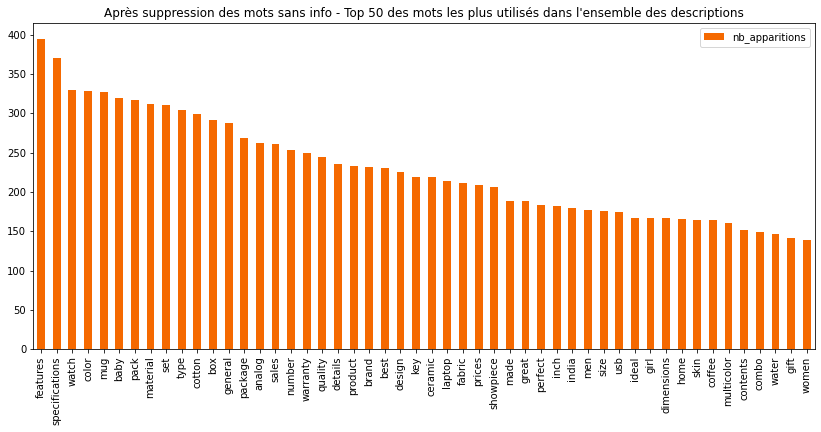

In [30]:
titre = 'Après suppression des mots sans info - Top 50 des mots les plus utilisés dans l\'ensemble des descriptions'
frequences_apparition_mots[:50].plot(kind='bar', 
                                     color="#f56900", 
                                     title=titre);

## Lemmatisation et stemming

In [31]:
# Instanciation de l'objet qui lemmatisera mes descriptions
from nltk.stem import WordNetLemmatizer
#nltk.download('wordnet') # une fois installé, affiche un warning
lemmatizer = WordNetLemmatizer()

In [32]:
descriptions

,uniq_id,description,description_tokenisee,description_sans_stopword
0,55b85ea15a1536d46b7190ad6fff8ce7,Key Features of Elegance Polyester Multicolor ...,"[key, features, of, elegance, polyester, multi...","[key, features, elegance, polyester, multicolo..."
1,7b72c92c2f6c40268628ec5f14c6d590,Specifications of Sathiyas Cotton Bath Towel (...,"[specifications, of, sathiyas, cotton, bath, t...","[specifications, sathiyas, cotton, bath, towel..."
2,64d5d4a258243731dc7bbb1eef49ad74,Key Features of Eurospa Cotton Terry Face Towe...,"[key, features, of, eurospa, cotton, terry, fa...","[key, features, eurospa, cotton, terry, face, ..."
3,d4684dcdc759dd9cdf41504698d737d8,Key Features of SANTOSH ROYAL FASHION Cotton P...,"[key, features, of, santosh, royal, fashion, c...","[key, features, santosh, royal, fashion, cotto..."
4,6325b6870c54cd47be6ebfbffa620ec7,Key Features of Jaipur Print Cotton Floral Kin...,"[key, features, of, jaipur, print, cotton, flo...","[key, features, jaipur, print, cotton, floral,..."
...,...,...,...,...
1045,958f54f4c46b53c8a0a9b8167d9140bc,Oren Empower Extra Large Self Adhesive Sticker...,"[oren, empower, extra, large, self, adhesive, ...","[oren, empower, extra, large, self, adhesive, ..."
1046,fd6cbcc22efb6b761bd564c28928483c,Wallmantra Large Vinyl Sticker Sticker (Pack o...,"[wallmantra, large, vinyl, sticker, sticker, p...","[wallmantra, large, vinyl, sticker, sticker, p..."
1047,5912e037d12774bb73a2048f35a00009,Buy Uberlyfe Extra Large Pigmented Polyvinyl F...,"[buy, uberlyfe, extra, large, pigmented, polyv...","[uberlyfe, extra, large, pigmented, polyvinyl,..."
1048,c3edc504d1b4f0ba6224fa53a43a7ad6,Buy Wallmantra Medium Vinyl Sticker Sticker fo...,"[buy, wallmantra, medium, vinyl, sticker, stic...","[wallmantra, medium, vinyl, sticker, sticker, ..."


In [33]:
# On lemmatise chacune des descriptions sans stopword
descriptions["description_lemmatisee"] = ""
for index_ligne, ligne in descriptions.iterrows():
    description_sans_stopword = ligne["description_sans_stopword"]
    descriptions.loc[index_ligne, "description_lemmatisee"] = [lemmatizer.lemmatize(mot) for mot in description_sans_stopword]

In [34]:
descriptions

,uniq_id,description,description_tokenisee,description_sans_stopword,description_lemmatisee
0,55b85ea15a1536d46b7190ad6fff8ce7,Key Features of Elegance Polyester Multicolor ...,"[key, features, of, elegance, polyester, multi...","[key, features, elegance, polyester, multicolo...","[key, feature, elegance, polyester, multicolor..."
1,7b72c92c2f6c40268628ec5f14c6d590,Specifications of Sathiyas Cotton Bath Towel (...,"[specifications, of, sathiyas, cotton, bath, t...","[specifications, sathiyas, cotton, bath, towel...","[specification, sathiyas, cotton, bath, towel,..."
2,64d5d4a258243731dc7bbb1eef49ad74,Key Features of Eurospa Cotton Terry Face Towe...,"[key, features, of, eurospa, cotton, terry, fa...","[key, features, eurospa, cotton, terry, face, ...","[key, feature, eurospa, cotton, terry, face, t..."
3,d4684dcdc759dd9cdf41504698d737d8,Key Features of SANTOSH ROYAL FASHION Cotton P...,"[key, features, of, santosh, royal, fashion, c...","[key, features, santosh, royal, fashion, cotto...","[key, feature, santosh, royal, fashion, cotton..."
4,6325b6870c54cd47be6ebfbffa620ec7,Key Features of Jaipur Print Cotton Floral Kin...,"[key, features, of, jaipur, print, cotton, flo...","[key, features, jaipur, print, cotton, floral,...","[key, feature, jaipur, print, cotton, floral, ..."
...,...,...,...,...,...
1045,958f54f4c46b53c8a0a9b8167d9140bc,Oren Empower Extra Large Self Adhesive Sticker...,"[oren, empower, extra, large, self, adhesive, ...","[oren, empower, extra, large, self, adhesive, ...","[oren, empower, extra, large, self, adhesive, ..."
1046,fd6cbcc22efb6b761bd564c28928483c,Wallmantra Large Vinyl Sticker Sticker (Pack o...,"[wallmantra, large, vinyl, sticker, sticker, p...","[wallmantra, large, vinyl, sticker, sticker, p...","[wallmantra, large, vinyl, sticker, sticker, p..."
1047,5912e037d12774bb73a2048f35a00009,Buy Uberlyfe Extra Large Pigmented Polyvinyl F...,"[buy, uberlyfe, extra, large, pigmented, polyv...","[uberlyfe, extra, large, pigmented, polyvinyl,...","[uberlyfe, extra, large, pigmented, polyvinyl,..."
1048,c3edc504d1b4f0ba6224fa53a43a7ad6,Buy Wallmantra Medium Vinyl Sticker Sticker fo...,"[buy, wallmantra, medium, vinyl, sticker, stic...","[wallmantra, medium, vinyl, sticker, sticker, ...","[wallmantra, medium, vinyl, sticker, sticker, ..."


La lemmatisation ne réduit que les noms sous leur forme canonique car la méthode ne fonctionne qu'avec un seul type de mot. Cette technique n'est pas forcément la plus appropriée pour l'anglais car les adjectifs sont invariables.

In [35]:
# On lemmatise sur les verbes chacune des descriptions sans stopword
descriptions["description_lemmatisee_verbe"] = ""
for index_ligne, ligne in descriptions.iterrows():
    description_sans_stopword = ligne["description_sans_stopword"]
    descriptions.loc[index_ligne, "description_lemmatisee_verbe"] = [lemmatizer.lemmatize(mot, 'v') 
                                                                     for mot in description_sans_stopword]

In [36]:
descriptions

,uniq_id,description,description_tokenisee,description_sans_stopword,description_lemmatisee,description_lemmatisee_verbe
0,55b85ea15a1536d46b7190ad6fff8ce7,Key Features of Elegance Polyester Multicolor ...,"[key, features, of, elegance, polyester, multi...","[key, features, elegance, polyester, multicolo...","[key, feature, elegance, polyester, multicolor...","[key, feature, elegance, polyester, multicolor..."
1,7b72c92c2f6c40268628ec5f14c6d590,Specifications of Sathiyas Cotton Bath Towel (...,"[specifications, of, sathiyas, cotton, bath, t...","[specifications, sathiyas, cotton, bath, towel...","[specification, sathiyas, cotton, bath, towel,...","[specifications, sathiyas, cotton, bath, towel..."
2,64d5d4a258243731dc7bbb1eef49ad74,Key Features of Eurospa Cotton Terry Face Towe...,"[key, features, of, eurospa, cotton, terry, fa...","[key, features, eurospa, cotton, terry, face, ...","[key, feature, eurospa, cotton, terry, face, t...","[key, feature, eurospa, cotton, terry, face, t..."
3,d4684dcdc759dd9cdf41504698d737d8,Key Features of SANTOSH ROYAL FASHION Cotton P...,"[key, features, of, santosh, royal, fashion, c...","[key, features, santosh, royal, fashion, cotto...","[key, feature, santosh, royal, fashion, cotton...","[key, feature, santosh, royal, fashion, cotton..."
4,6325b6870c54cd47be6ebfbffa620ec7,Key Features of Jaipur Print Cotton Floral Kin...,"[key, features, of, jaipur, print, cotton, flo...","[key, features, jaipur, print, cotton, floral,...","[key, feature, jaipur, print, cotton, floral, ...","[key, feature, jaipur, print, cotton, floral, ..."
...,...,...,...,...,...,...
1045,958f54f4c46b53c8a0a9b8167d9140bc,Oren Empower Extra Large Self Adhesive Sticker...,"[oren, empower, extra, large, self, adhesive, ...","[oren, empower, extra, large, self, adhesive, ...","[oren, empower, extra, large, self, adhesive, ...","[oren, empower, extra, large, self, adhesive, ..."
1046,fd6cbcc22efb6b761bd564c28928483c,Wallmantra Large Vinyl Sticker Sticker (Pack o...,"[wallmantra, large, vinyl, sticker, sticker, p...","[wallmantra, large, vinyl, sticker, sticker, p...","[wallmantra, large, vinyl, sticker, sticker, p...","[wallmantra, large, vinyl, sticker, sticker, p..."
1047,5912e037d12774bb73a2048f35a00009,Buy Uberlyfe Extra Large Pigmented Polyvinyl F...,"[buy, uberlyfe, extra, large, pigmented, polyv...","[uberlyfe, extra, large, pigmented, polyvinyl,...","[uberlyfe, extra, large, pigmented, polyvinyl,...","[uberlyfe, extra, large, pigment, polyvinyl, f..."
1048,c3edc504d1b4f0ba6224fa53a43a7ad6,Buy Wallmantra Medium Vinyl Sticker Sticker fo...,"[buy, wallmantra, medium, vinyl, sticker, stic...","[wallmantra, medium, vinyl, sticker, sticker, ...","[wallmantra, medium, vinyl, sticker, sticker, ...","[wallmantra, medium, vinyl, sticker, sticker, ..."


In [37]:
# Instanciation de l'objet qui ne conservera que les racines des descriptions
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()

In [38]:
descriptions

,uniq_id,description,description_tokenisee,description_sans_stopword,description_lemmatisee,description_lemmatisee_verbe
0,55b85ea15a1536d46b7190ad6fff8ce7,Key Features of Elegance Polyester Multicolor ...,"[key, features, of, elegance, polyester, multi...","[key, features, elegance, polyester, multicolo...","[key, feature, elegance, polyester, multicolor...","[key, feature, elegance, polyester, multicolor..."
1,7b72c92c2f6c40268628ec5f14c6d590,Specifications of Sathiyas Cotton Bath Towel (...,"[specifications, of, sathiyas, cotton, bath, t...","[specifications, sathiyas, cotton, bath, towel...","[specification, sathiyas, cotton, bath, towel,...","[specifications, sathiyas, cotton, bath, towel..."
2,64d5d4a258243731dc7bbb1eef49ad74,Key Features of Eurospa Cotton Terry Face Towe...,"[key, features, of, eurospa, cotton, terry, fa...","[key, features, eurospa, cotton, terry, face, ...","[key, feature, eurospa, cotton, terry, face, t...","[key, feature, eurospa, cotton, terry, face, t..."
3,d4684dcdc759dd9cdf41504698d737d8,Key Features of SANTOSH ROYAL FASHION Cotton P...,"[key, features, of, santosh, royal, fashion, c...","[key, features, santosh, royal, fashion, cotto...","[key, feature, santosh, royal, fashion, cotton...","[key, feature, santosh, royal, fashion, cotton..."
4,6325b6870c54cd47be6ebfbffa620ec7,Key Features of Jaipur Print Cotton Floral Kin...,"[key, features, of, jaipur, print, cotton, flo...","[key, features, jaipur, print, cotton, floral,...","[key, feature, jaipur, print, cotton, floral, ...","[key, feature, jaipur, print, cotton, floral, ..."
...,...,...,...,...,...,...
1045,958f54f4c46b53c8a0a9b8167d9140bc,Oren Empower Extra Large Self Adhesive Sticker...,"[oren, empower, extra, large, self, adhesive, ...","[oren, empower, extra, large, self, adhesive, ...","[oren, empower, extra, large, self, adhesive, ...","[oren, empower, extra, large, self, adhesive, ..."
1046,fd6cbcc22efb6b761bd564c28928483c,Wallmantra Large Vinyl Sticker Sticker (Pack o...,"[wallmantra, large, vinyl, sticker, sticker, p...","[wallmantra, large, vinyl, sticker, sticker, p...","[wallmantra, large, vinyl, sticker, sticker, p...","[wallmantra, large, vinyl, sticker, sticker, p..."
1047,5912e037d12774bb73a2048f35a00009,Buy Uberlyfe Extra Large Pigmented Polyvinyl F...,"[buy, uberlyfe, extra, large, pigmented, polyv...","[uberlyfe, extra, large, pigmented, polyvinyl,...","[uberlyfe, extra, large, pigmented, polyvinyl,...","[uberlyfe, extra, large, pigment, polyvinyl, f..."
1048,c3edc504d1b4f0ba6224fa53a43a7ad6,Buy Wallmantra Medium Vinyl Sticker Sticker fo...,"[buy, wallmantra, medium, vinyl, sticker, stic...","[wallmantra, medium, vinyl, sticker, sticker, ...","[wallmantra, medium, vinyl, sticker, sticker, ...","[wallmantra, medium, vinyl, sticker, sticker, ..."


In [39]:
# On ne garde que les racines des mots de chacune des descriptions sans stopword
descriptions["description_stemmee"] = ""
for index_ligne, ligne in descriptions.iterrows():
    description_sans_stopword = ligne["description_sans_stopword"]
    descriptions.loc[index_ligne, "description_stemmee"] = [stemmer.stem(mot) for mot in description_sans_stopword]

In [40]:
descriptions

,uniq_id,description,description_tokenisee,description_sans_stopword,description_lemmatisee,description_lemmatisee_verbe,description_stemmee
0,55b85ea15a1536d46b7190ad6fff8ce7,Key Features of Elegance Polyester Multicolor ...,"[key, features, of, elegance, polyester, multi...","[key, features, elegance, polyester, multicolo...","[key, feature, elegance, polyester, multicolor...","[key, feature, elegance, polyester, multicolor...","[key, featur, eleg, polyest, multicolor, abstr..."
1,7b72c92c2f6c40268628ec5f14c6d590,Specifications of Sathiyas Cotton Bath Towel (...,"[specifications, of, sathiyas, cotton, bath, t...","[specifications, sathiyas, cotton, bath, towel...","[specification, sathiyas, cotton, bath, towel,...","[specifications, sathiyas, cotton, bath, towel...","[specif, sathiya, cotton, bath, towel, bath, t..."
2,64d5d4a258243731dc7bbb1eef49ad74,Key Features of Eurospa Cotton Terry Face Towe...,"[key, features, of, eurospa, cotton, terry, fa...","[key, features, eurospa, cotton, terry, face, ...","[key, feature, eurospa, cotton, terry, face, t...","[key, feature, eurospa, cotton, terry, face, t...","[key, featur, eurospa, cotton, terri, face, to..."
3,d4684dcdc759dd9cdf41504698d737d8,Key Features of SANTOSH ROYAL FASHION Cotton P...,"[key, features, of, santosh, royal, fashion, c...","[key, features, santosh, royal, fashion, cotto...","[key, feature, santosh, royal, fashion, cotton...","[key, feature, santosh, royal, fashion, cotton...","[key, featur, santosh, royal, fashion, cotton,..."
4,6325b6870c54cd47be6ebfbffa620ec7,Key Features of Jaipur Print Cotton Floral Kin...,"[key, features, of, jaipur, print, cotton, flo...","[key, features, jaipur, print, cotton, floral,...","[key, feature, jaipur, print, cotton, floral, ...","[key, feature, jaipur, print, cotton, floral, ...","[key, featur, jaipur, print, cotton, floral, k..."
...,...,...,...,...,...,...,...
1045,958f54f4c46b53c8a0a9b8167d9140bc,Oren Empower Extra Large Self Adhesive Sticker...,"[oren, empower, extra, large, self, adhesive, ...","[oren, empower, extra, large, self, adhesive, ...","[oren, empower, extra, large, self, adhesive, ...","[oren, empower, extra, large, self, adhesive, ...","[oren, empow, extra, larg, self, adhes, sticke..."
1046,fd6cbcc22efb6b761bd564c28928483c,Wallmantra Large Vinyl Sticker Sticker (Pack o...,"[wallmantra, large, vinyl, sticker, sticker, p...","[wallmantra, large, vinyl, sticker, sticker, p...","[wallmantra, large, vinyl, sticker, sticker, p...","[wallmantra, large, vinyl, sticker, sticker, p...","[wallmantra, larg, vinyl, sticker, sticker, pa..."
1047,5912e037d12774bb73a2048f35a00009,Buy Uberlyfe Extra Large Pigmented Polyvinyl F...,"[buy, uberlyfe, extra, large, pigmented, polyv...","[uberlyfe, extra, large, pigmented, polyvinyl,...","[uberlyfe, extra, large, pigmented, polyvinyl,...","[uberlyfe, extra, large, pigment, polyvinyl, f...","[uberlyf, extra, larg, pigment, polyvinyl, fil..."
1048,c3edc504d1b4f0ba6224fa53a43a7ad6,Buy Wallmantra Medium Vinyl Sticker Sticker fo...,"[buy, wallmantra, medium, vinyl, sticker, stic...","[wallmantra, medium, vinyl, sticker, sticker, ...","[wallmantra, medium, vinyl, sticker, sticker, ...","[wallmantra, medium, vinyl, sticker, sticker, ...","[wallmantra, medium, vinyl, sticker, sticker, ..."


# Construction de features

## Bag-of-words 1-gram

### Avec la lemmatisation

In [108]:
# Préparation du dataset
bag_of_words_lemme = descriptions[["uniq_id", "description", "description_lemmatisee_verbe"]].copy()

# Renommage de la colonne description car le mot existe et une autre variable est créée avec le bag of words
bag_of_words_lemme.rename(columns={"description": "full_description"}, inplace=True)

In [110]:
# Conversion des descriptions lemmatisées sous forme de liste vers un string
for index_ligne, ligne in bag_of_words_lemme.iterrows():
    description_lemmatisee_liste = ligne["description_lemmatisee_verbe"]
    bag_of_words_lemme.loc[index_ligne, "description_lemmatisee_txt"] = ' '.join(description_lemmatisee_liste)

In [111]:
liste_descriptions_lemmatisees = bag_of_words_lemme["description_lemmatisee_txt"].to_list()

In [112]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer() #to take max features(columns), 2500
x = cv.fit_transform(liste_descriptions_lemmatisees).toarray()
liste_vocabulaire = cv.get_feature_names()
bag_of_words = pd.DataFrame(data=x, columns=liste_vocabulaire)
bag_of_words_lemme = pd.concat([bag_of_words_lemme, bag_of_words], axis=1)

Le CountVectorizer ne compte pas les mots d'une lettre, ces "mots" ne font donc pas partie du bag of words. Environ 25% des descriptions contiennent ce type de mots, quelques-unes d'entre elles ont 28 mots d'une lettre dans leur description. 

In [152]:
bag_of_words_lemme

,uniq_id,full_description,description_lemmatisee_verbe,description_lemmatisee_txt,aa,aaa,aapno,aari,aarika,abide,...,zikrak,zinc,zingalalaa,zip,zipexterior,zipper,zone,zoom,zora,zyxel
0,55b85ea15a1536d46b7190ad6fff8ce7,Key Features of Elegance Polyester Multicolor ...,"[key, feature, elegance, polyester, multicolor...",key feature elegance polyester multicolor abst...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7b72c92c2f6c40268628ec5f14c6d590,Specifications of Sathiyas Cotton Bath Towel (...,"[specifications, sathiyas, cotton, bath, towel...",specifications sathiyas cotton bath towel bath...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,64d5d4a258243731dc7bbb1eef49ad74,Key Features of Eurospa Cotton Terry Face Towe...,"[key, feature, eurospa, cotton, terry, face, t...",key feature eurospa cotton terry face towel se...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,d4684dcdc759dd9cdf41504698d737d8,Key Features of SANTOSH ROYAL FASHION Cotton P...,"[key, feature, santosh, royal, fashion, cotton...",key feature santosh royal fashion cotton print...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,6325b6870c54cd47be6ebfbffa620ec7,Key Features of Jaipur Print Cotton Floral Kin...,"[key, feature, jaipur, print, cotton, floral, ...",key feature jaipur print cotton floral king si...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1045,958f54f4c46b53c8a0a9b8167d9140bc,Oren Empower Extra Large Self Adhesive Sticker...,"[oren, empower, extra, large, self, adhesive, ...",oren empower extra large self adhesive sticker...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1046,fd6cbcc22efb6b761bd564c28928483c,Wallmantra Large Vinyl Sticker Sticker (Pack o...,"[wallmantra, large, vinyl, sticker, sticker, p...",wallmantra large vinyl sticker sticker pack br...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1047,5912e037d12774bb73a2048f35a00009,Buy Uberlyfe Extra Large Pigmented Polyvinyl F...,"[uberlyfe, extra, large, pigment, polyvinyl, f...",uberlyfe extra large pigment polyvinyl film im...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1048,c3edc504d1b4f0ba6224fa53a43a7ad6,Buy Wallmantra Medium Vinyl Sticker Sticker fo...,"[wallmantra, medium, vinyl, sticker, sticker, ...",wallmantra medium vinyl sticker sticker wallma...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Avec le stemming

In [114]:
# Préparation du dataset
bag_of_words_stem = descriptions[["uniq_id", "description", "description_stemmee"]].copy()

# Renommage de la colonne description car le mot existe et une autre variable est créée avec le bag of words
bag_of_words_stem.rename(columns={"description": "full_description"}, inplace=True)

In [116]:
# Conversion des descriptions stemmées sous forme de liste vers un string
for index_ligne, ligne in bag_of_words_stem.iterrows():
    description_stemmee_liste = ligne["description_stemmee"]
    bag_of_words_stem.loc[index_ligne, "description_stemmee_txt"] = ' '.join(description_stemmee_liste)

In [117]:
liste_descriptions_stemmees = bag_of_words_stem["description_stemmee_txt"].to_list()

In [118]:
# Comptabilisation des mots de chacune des descriptions et création des features
x = cv.fit_transform(liste_descriptions_stemmees).toarray()
liste_vocabulaire = cv.get_feature_names()
bag_of_words = pd.DataFrame(data=x, columns=liste_vocabulaire)
bag_of_words_stem = pd.concat([bag_of_words_stem, bag_of_words], axis=1)

In [119]:
description_stemmee = bag_of_words_stem["description_stemmee"].copy()
verif = pd.DataFrame(data=description_stemmee, columns=["description_stemmee"])

In [120]:
for index_ligne, ligne in verif.iterrows():
    verif.loc[index_ligne, "nb_mots_description_stemmee"] = len(verif["description_stemmee"][index_ligne])

In [121]:
verif["nb_mots_description_bow"] = bag_of_words_stem[liste_vocabulaire].sum(axis=1)

In [122]:
verif

,description_stemmee,nb_mots_description_stemmee,nb_mots_description_bow
0,"[key, featur, eleg, polyest, multicolor, abstr...",145.0,145
1,"[specif, sathiya, cotton, bath, towel, bath, t...",60.0,60
2,"[key, featur, eurospa, cotton, terri, face, to...",148.0,147
3,"[key, featur, santosh, royal, fashion, cotton,...",104.0,104
4,"[key, featur, jaipur, print, cotton, floral, k...",141.0,140
...,...,...,...
1045,"[oren, empow, extra, larg, self, adhes, sticke...",222.0,220
1046,"[wallmantra, larg, vinyl, sticker, sticker, pa...",148.0,148
1047,"[uberlyf, extra, larg, pigment, polyvinyl, fil...",18.0,18
1048,"[wallmantra, medium, vinyl, sticker, sticker, ...",12.0,12


In [123]:
verif["description_stemmee"][1045]

['oren',
 'empow',
 'extra',
 'larg',
 'self',
 'adhes',
 'sticker',
 'pack',
 'doubl',
 'sticker',
 'use',
 'big',
 'wall',
 'two',
 'piec',
 'arrang',
 'altern',
 'reflect',
 'cor',
 'wall',
 'like',
 'look',
 'tree',
 'green',
 'shade',
 'leav',
 'give',
 'sharp',
 'featur',
 'greeneri',
 'reusabl',
 'e',
 'use',
 'appli',
 'simpl',
 'remov',
 'use',
 'sticker',
 'anoth',
 'wall',
 'differ',
 'idea',
 'instal',
 'surfac',
 'wish',
 'attach',
 'decal',
 'must',
 'clean',
 'dust',
 'greas',
 'contamin',
 'simpli',
 'peel',
 'pre',
 'cut',
 'piec',
 'wall',
 'sticker',
 'back',
 'paper',
 'appli',
 'desir',
 'area',
 'note',
 'freshli',
 'paint',
 'lacquer',
 'surfac',
 'must',
 'allow',
 'complet',
 'cure',
 'decal',
 'appli',
 'recommend',
 'wait',
 'minimum',
 'week',
 'discourag',
 'instal',
 'certain',
 'surfac',
 'brick',
 'stucco',
 'concret',
 'block',
 'sued',
 'paint',
 'sand',
 'paint',
 'appli',
 'wet',
 'wall',
 'press',
 'firmli',
 'squeez',
 'air',
 'bubbl',
 'note',
 'h

## Bag-of-words 2-gram

### Avec la lemmatisation

In [124]:
# Préparation du dataset
bag_of_words_lemme_2gram = bag_of_words_lemme[["uniq_id", "full_description", 
                                               "description_lemmatisee_verbe", "description_lemmatisee_txt"]].copy()

In [126]:
# Liste de l'ensemble des descriptions
liste_descriptions_lemmatisees = bag_of_words_lemme["description_lemmatisee_txt"].to_list()

In [128]:
# Comptabilisation des mots de chacune des descriptions et création des features
cv = CountVectorizer(ngram_range=(2, 2)) #to take max features(columns), 2500
x = cv.fit_transform(liste_descriptions_lemmatisees).toarray()
liste_vocabulaire = cv.get_feature_names()
bag_of_words = pd.DataFrame(data=x, columns=liste_vocabulaire)
bag_of_words_lemme_2gram = pd.concat([bag_of_words_lemme_2gram, bag_of_words], axis=1)

In [131]:
bag_of_words_lemme_2gram

,uniq_id,full_description,description_lemmatisee_verbe,description_lemmatisee_txt,aa batteries,aa pencil,aaa battery,aapno rajasthan,aari embroider,aari embroidery,...,zipper brand,zipper compartment,zone pillow,zone print,zone uv,zoom type,zora laptop,zyxel data,zyxel pla,zyxel vmg
0,55b85ea15a1536d46b7190ad6fff8ce7,Key Features of Elegance Polyester Multicolor ...,"[key, feature, elegance, polyester, multicolor...",key feature elegance polyester multicolor abst...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7b72c92c2f6c40268628ec5f14c6d590,Specifications of Sathiyas Cotton Bath Towel (...,"[specifications, sathiyas, cotton, bath, towel...",specifications sathiyas cotton bath towel bath...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,64d5d4a258243731dc7bbb1eef49ad74,Key Features of Eurospa Cotton Terry Face Towe...,"[key, feature, eurospa, cotton, terry, face, t...",key feature eurospa cotton terry face towel se...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,d4684dcdc759dd9cdf41504698d737d8,Key Features of SANTOSH ROYAL FASHION Cotton P...,"[key, feature, santosh, royal, fashion, cotton...",key feature santosh royal fashion cotton print...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,6325b6870c54cd47be6ebfbffa620ec7,Key Features of Jaipur Print Cotton Floral Kin...,"[key, feature, jaipur, print, cotton, floral, ...",key feature jaipur print cotton floral king si...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1045,958f54f4c46b53c8a0a9b8167d9140bc,Oren Empower Extra Large Self Adhesive Sticker...,"[oren, empower, extra, large, self, adhesive, ...",oren empower extra large self adhesive sticker...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1046,fd6cbcc22efb6b761bd564c28928483c,Wallmantra Large Vinyl Sticker Sticker (Pack o...,"[wallmantra, large, vinyl, sticker, sticker, p...",wallmantra large vinyl sticker sticker pack br...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1047,5912e037d12774bb73a2048f35a00009,Buy Uberlyfe Extra Large Pigmented Polyvinyl F...,"[uberlyfe, extra, large, pigment, polyvinyl, f...",uberlyfe extra large pigment polyvinyl film im...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1048,c3edc504d1b4f0ba6224fa53a43a7ad6,Buy Wallmantra Medium Vinyl Sticker Sticker fo...,"[wallmantra, medium, vinyl, sticker, sticker, ...",wallmantra medium vinyl sticker sticker wallma...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Avec le stemming

In [142]:
# Préparation du dataset
bag_of_words_stem_2gram = bag_of_words_stem[["uniq_id", "full_description", 
                                             "description_stemmee", "description_stemmee_txt"]].copy()

In [143]:
# Liste de l'ensemble des descriptions
liste_descriptions_stemmees = bag_of_words_stem["description_stemmee_txt"].to_list()

In [144]:
# Comptabilisation des mots de chacune des descriptions et création des features
cv = CountVectorizer(ngram_range=(2, 2)) #to take max features(columns), 2500
x = cv.fit_transform(liste_descriptions_stemmees).toarray()
liste_vocabulaire = cv.get_feature_names()
bag_of_words = pd.DataFrame(data=x, columns=liste_vocabulaire)
bag_of_words_stem_2gram = pd.concat([bag_of_words_stem_2gram, bag_of_words], axis=1)

In [145]:
len(liste_vocabulaire)

17538

In [146]:
bag_of_words_stem_2gram

,uniq_id,full_description,description_stemmee,description_stemmee_txt,aa batteri,aa pencil,aaa batteri,aapno rajasthan,aari embroid,aari embroideri,...,zipper brand,zipper compart,zone pillow,zone print,zone uv,zoom type,zora laptop,zyxel data,zyxel pla,zyxel vmg
0,55b85ea15a1536d46b7190ad6fff8ce7,Key Features of Elegance Polyester Multicolor ...,"[key, featur, eleg, polyest, multicolor, abstr...",key featur eleg polyest multicolor abstract ey...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7b72c92c2f6c40268628ec5f14c6d590,Specifications of Sathiyas Cotton Bath Towel (...,"[specif, sathiya, cotton, bath, towel, bath, t...",specif sathiya cotton bath towel bath towel re...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,64d5d4a258243731dc7bbb1eef49ad74,Key Features of Eurospa Cotton Terry Face Towe...,"[key, featur, eurospa, cotton, terri, face, to...",key featur eurospa cotton terri face towel set...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,d4684dcdc759dd9cdf41504698d737d8,Key Features of SANTOSH ROYAL FASHION Cotton P...,"[key, featur, santosh, royal, fashion, cotton,...",key featur santosh royal fashion cotton print ...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,6325b6870c54cd47be6ebfbffa620ec7,Key Features of Jaipur Print Cotton Floral Kin...,"[key, featur, jaipur, print, cotton, floral, k...",key featur jaipur print cotton floral king siz...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1045,958f54f4c46b53c8a0a9b8167d9140bc,Oren Empower Extra Large Self Adhesive Sticker...,"[oren, empow, extra, larg, self, adhes, sticke...",oren empow extra larg self adhes sticker pack ...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1046,fd6cbcc22efb6b761bd564c28928483c,Wallmantra Large Vinyl Sticker Sticker (Pack o...,"[wallmantra, larg, vinyl, sticker, sticker, pa...",wallmantra larg vinyl sticker sticker pack bri...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1047,5912e037d12774bb73a2048f35a00009,Buy Uberlyfe Extra Large Pigmented Polyvinyl F...,"[uberlyf, extra, larg, pigment, polyvinyl, fil...",uberlyf extra larg pigment polyvinyl film impo...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1048,c3edc504d1b4f0ba6224fa53a43a7ad6,Buy Wallmantra Medium Vinyl Sticker Sticker fo...,"[wallmantra, medium, vinyl, sticker, sticker, ...",wallmantra medium vinyl sticker sticker wallma...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## TF/IDF

### Avec la lemmatisation

In [138]:
# Préparation du dataset
tf_idf_lemme = bag_of_words_lemme[["uniq_id", "full_description", 
                                   "description_lemmatisee_verbe", "description_lemmatisee_txt"]].copy()

In [140]:
# Liste de l'ensemble des descriptions
liste_descriptions_lemmatisees = tf_idf_lemme["description_lemmatisee_txt"].to_list()

In [147]:
# Comptabilisation des mots de chacune des descriptions et création des features
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer() #to take max features(columns), 2500
x = vectorizer.fit_transform(liste_descriptions_lemmatisees).toarray()
liste_vocabulaire = vectorizer.get_feature_names()
tf_idf = pd.DataFrame(data=x, columns=liste_vocabulaire)
tf_idf_lemme = pd.concat([tf_idf_lemme, tf_idf], axis=1)

In [151]:
len(liste_vocabulaire)

4469

In [157]:
tf_idf_lemme.describe()

,aa,aaa,aapno,aari,aarika,abide,abilities,ability,abkl,able,...,zikrak,zinc,zingalalaa,zip,zipexterior,zipper,zone,zoom,zora,zyxel
count,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000,...,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000
mean,0.000189,0.000090,0.001208,0.000342,0.000117,0.000341,0.000059,0.000225,0.000578,0.000690,...,0.000547,0.000185,0.000141,0.000031,0.000072,0.000181,0.000663,0.000071,0.000333,0.001507
std,0.004361,0.002926,0.023160,0.011090,0.003803,0.007998,0.001921,0.007293,0.010806,0.011237,...,0.017714,0.005985,0.004574,0.001018,0.002331,0.003628,0.015311,0.002287,0.010786,0.029287
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,0.109423,0.094822,0.555571,0.359341,0.123237,0.218316,0.062240,0.236330,0.209948,0.194132,...,0.573996,0.193943,0.148211,0.032984,0.075534,0.085893,0.393866,0.074106,0.349516,0.670840


### Avec le stemming

In [159]:
# Préparation du dataset
tf_idf_stem = bag_of_words_stem[["uniq_id", "full_description", 
                                 "description_stemmee", "description_stemmee_txt"]].copy()

In [160]:
# Liste de l'ensemble des descriptions
liste_descriptions_stemmees = tf_idf_stem["description_stemmee_txt"].to_list()

In [161]:
# Comptabilisation des mots de chacune des descriptions et création des features
x = vectorizer.fit_transform(liste_descriptions_stemmees).toarray()
liste_vocabulaire = vectorizer.get_feature_names()
tf_idf = pd.DataFrame(data=x, columns=liste_vocabulaire)
tf_idf_stem = pd.concat([tf_idf_stem, tf_idf], axis=1)

In [162]:
len(liste_vocabulaire)

4073

In [165]:
tf_idf_stem

,uniq_id,full_description,description_stemmee,description_stemmee_txt,aa,aaa,aapno,aari,aarika,abil,...,zikrak,zinc,zingalalaa,zip,zipexterior,zipper,zone,zoom,zora,zyxel
0,55b85ea15a1536d46b7190ad6fff8ce7,Key Features of Elegance Polyester Multicolor ...,"[key, featur, eleg, polyest, multicolor, abstr...",key featur eleg polyest multicolor abstract ey...,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,7b72c92c2f6c40268628ec5f14c6d590,Specifications of Sathiyas Cotton Bath Towel (...,"[specif, sathiya, cotton, bath, towel, bath, t...",specif sathiya cotton bath towel bath towel re...,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,64d5d4a258243731dc7bbb1eef49ad74,Key Features of Eurospa Cotton Terry Face Towe...,"[key, featur, eurospa, cotton, terri, face, to...",key featur eurospa cotton terri face towel set...,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,d4684dcdc759dd9cdf41504698d737d8,Key Features of SANTOSH ROYAL FASHION Cotton P...,"[key, featur, santosh, royal, fashion, cotton,...",key featur santosh royal fashion cotton print ...,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,6325b6870c54cd47be6ebfbffa620ec7,Key Features of Jaipur Print Cotton Floral Kin...,"[key, featur, jaipur, print, cotton, floral, k...",key featur jaipur print cotton floral king siz...,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1045,958f54f4c46b53c8a0a9b8167d9140bc,Oren Empower Extra Large Self Adhesive Sticker...,"[oren, empow, extra, larg, self, adhes, sticke...",oren empow extra larg self adhes sticker pack ...,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1046,fd6cbcc22efb6b761bd564c28928483c,Wallmantra Large Vinyl Sticker Sticker (Pack o...,"[wallmantra, larg, vinyl, sticker, sticker, pa...",wallmantra larg vinyl sticker sticker pack bri...,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1047,5912e037d12774bb73a2048f35a00009,Buy Uberlyfe Extra Large Pigmented Polyvinyl F...,"[uberlyf, extra, larg, pigment, polyvinyl, fil...",uberlyf extra larg pigment polyvinyl film impo...,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1048,c3edc504d1b4f0ba6224fa53a43a7ad6,Buy Wallmantra Medium Vinyl Sticker Sticker fo...,"[wallmantra, medium, vinyl, sticker, sticker, ...",wallmantra medium vinyl sticker sticker wallma...,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [166]:
tf_idf_stem.describe()

,aa,aaa,aapno,aari,aarika,abil,abkl,abl,abod,abras,...,zikrak,zinc,zingalalaa,zip,zipexterior,zipper,zone,zoom,zora,zyxel
count,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000,...,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000
mean,0.000190,0.000089,0.001213,0.000344,0.000118,0.000269,0.000580,0.000694,0.000343,0.000032,...,0.000547,0.000181,0.000142,0.000032,0.000073,0.000178,0.000671,0.000071,0.000328,0.001507
std,0.004373,0.002878,0.023244,0.011131,0.003809,0.007192,0.010851,0.011318,0.008053,0.001021,...,0.017714,0.005869,0.004587,0.001021,0.002362,0.003545,0.015498,0.002294,0.010620,0.029287
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,0.111128,0.093248,0.556000,0.360696,0.123441,0.226144,0.210887,0.196345,0.220976,0.033089,...,0.573996,0.190169,0.148643,0.033089,0.076548,0.079746,0.396539,0.074321,0.344142,0.670840
